O desafio que temos em mãos é adicionar um novo vértice a uma rede, a fim de aumentar o fluxo de informação no sistema e, consequentemente, elevar a centralidade intermediária da rede, também conhecida como betweenness centrality. De forma mais precisa, nosso objetivo é inserir um nó no grafo com L conexões, de modo que esse acréscimo maximize a menor betweenness da rede.

Precisamos resolver o problema de expansão da rede, no qual a adição estratégica de um novo vértice pode fortalecer a eficiência da comunicação entre os nós existentes. Para atingir esse objetivo, devemos escolher cuidadosamente o local e as conexões desse novo nó, a fim de otimizar a capacidade de transferência de informações.

Formalmente, buscamos identificar a posição ideal para a inclusão do novo vértice e as conexões mais propícias para maximizar a betweenness centrality mínima da rede. Ao realizar essa adição de forma inteligente, seremos capazes de promover uma distribuição mais eficiente de informações, permitindo que elas fluam de maneira mais rápida e eficaz pelos diferentes componentes do sistema.

Portanto, o objetivo principal é encontrar a melhor estratégia para a expansão do grafo, com a inserção de um nó e suas respectivas conexões, de modo a aprimorar a entrecentralidade mínima da rede e, consequentemente, melhorar o fluxo de informações no sistema. Para isso usaremos MetaHeurísticas para encontrar a melhor solução, pois o cálculo é ruim computacionalmente.

In [28]:
%load_ext autoreload
%autoreload 2
# Importação das Bibliotecas
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from AG import *
from LS import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# Definição da Rede
N = 100
G = nx.erdos_renyi_graph(N, 0.5)

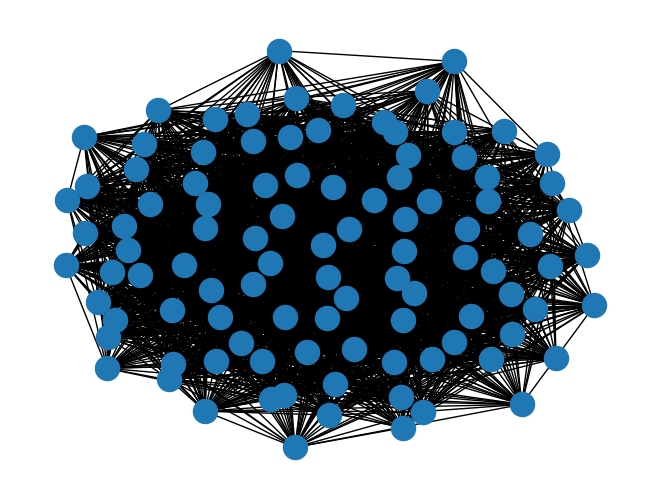

In [21]:
nx.draw(G)

In [8]:
#Cálculo da nossa função objetivo
def objetivo(Grafo,sitio):
    G = Grafo.copy()
    N = len(G.nodes)
    sitios = np.arange(N)
    ligações = [(N+1,i) for i in sitios[sitio]]
    G.add_edges_from(ligações)
    return min(list(nx.betweenness_centrality(G).values()))

Aqui, o primeiro algoritmo utilizado é um Algoritmo Genético. Nesse algoritmo, trabalhamos com uma pequena população inicial, que é evoluída através de mutações e combinações de genes, com o objetivo de encontrar uma solução ótima para o problema em questão.

O Algoritmo Genético é inspirado no processo evolutivo observado na natureza, onde indivíduos com características favoráveis têm maior probabilidade de sobreviver e passar seus genes adiante. Da mesma forma, nesse algoritmo, selecionamos os indivíduos mais promissores da população inicial para criar novas gerações, introduzindo variações genéticas por meio de mutações e recombinações.

In [22]:
grafico,sitios = AG(G,N,10,objetivo,100,100,4000)

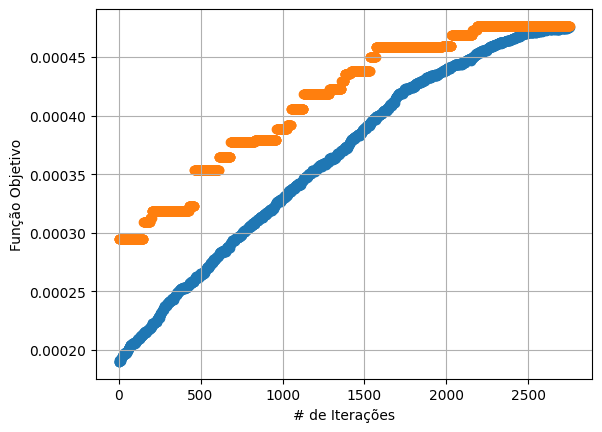

In [33]:
plt.scatter(grafico[0],grafico[1], label = 'Valor Médio')
plt.scatter(grafico[0],grafico[2],label = 'Valor máximo')
plt.ylabel("Função Objetivo")
plt.xlabel("# de Iterações")
plt.grid()
plt.show()

Aqui é utilziado o algoritmo Local Search é utilizado em problemas de otimização para encontrar soluções aproximadas. Ele começa com uma solução inicial e faz modificações nessa solução, avaliando a qualidade por meio de uma função objetivo. O algoritmo repete esse processo várias vezes, buscando melhorar a solução encontrada. Embora não garanta a melhor solução possível, o Local Search oferece uma abordagem eficiente para resolver problemas complexos de otimização.

O algoritmo Local Search é uma técnica iterativa para encontrar soluções aproximadas em problemas de otimização. Ele parte de uma solução inicial e realiza movimentos para melhorar a qualidade da solução. A cada movimento, a solução é avaliada e, se for melhor do que a atual, é mantida. O algoritmo continua repetindo esses passos até atingir um critério de parada. Embora não seja garantido que a melhor solução seja encontrada, o Local Search é uma estratégia eficiente para problemas complexos de otimização.

In [29]:
s = LocalSearch(G,N,10,objetivo,847)

310


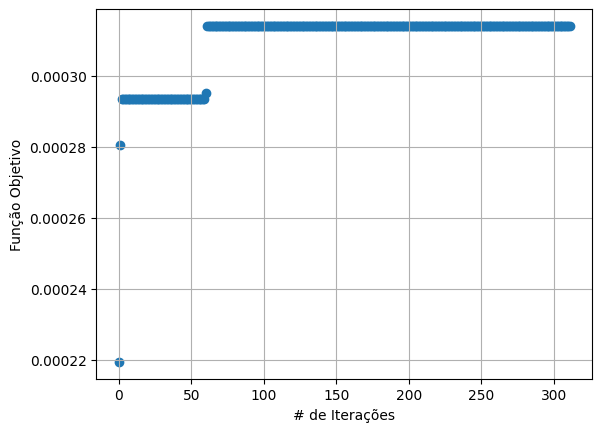

In [34]:
plt.scatter(s.T[0],s.T[1])
plt.grid()
plt.ylabel("Função Objetivo")
plt.xlabel("# de Iterações")
plt.show()